## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8]
l1_l2_EXP = [1e-2, 1e-4, 1e-8]

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0718 10:49:47.080049 20040 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 10:49:47.082049 20040 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 10:49:47.148074 20040 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0718 10:49:47.262100 20040 deprecation.py:323] From C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 198.6685 - acc: 0.2436 - val_loss: 41.1079 - val_acc: 0.2645
Epoch 2/50
50000/50000 [==============================] - 7s 148us/step - loss: 19.1043 - acc: 0.1178 - val_loss: 7.2944 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 4.1141 - acc: 0.0986 - val_loss: 2.6522 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.4870 - acc: 0.0985 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.462

Epoch 2/50
50000/50000 [==============================] - 7s 148us/step - loss: 5.7206 - acc: 0.3625 - val_loss: 5.6362 - val_acc: 0.3806
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 5.5721 - acc: 0.3935 - val_loss: 5.5056 - val_acc: 0.4027
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 5.4495 - acc: 0.4139 - val_loss: 5.3935 - val_acc: 0.4262
Epoch 5/50
50000/50000 [==============================] - 7s 144us/step - loss: 5.3427 - acc: 0.4296 - val_loss: 5.2891 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 5.2396 - acc: 0.4435 - val_loss: 5.1963 - val_acc: 0.4446
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 5.1457 - acc: 0.4554 - val_loss: 5.1168 - val_acc: 0.4463
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 5.0549 - acc: 0.4651 - val_loss: 5.0505 - val_acc: 0.4453
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 149us/step - loss: 1.7300 - acc: 0.3958 - val_loss: 1.7007 - val_acc: 0.4091
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6695 - acc: 0.4167 - val_loss: 1.6507 - val_acc: 0.4174
Epoch 5/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6226 - acc: 0.4314 - val_loss: 1.6085 - val_acc: 0.4425
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5796 - acc: 0.4465 - val_loss: 1.5707 - val_acc: 0.4477
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5440 - acc: 0.4595 - val_loss: 1.5406 - val_acc: 0.4584
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5126 - acc: 0.4701 - val_loss: 1.5189 - val_acc: 0.4587
Epoch 9/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4835 - acc: 0.4794 - val_loss: 1.5117 - val_acc: 0.4601
Epoch 10/50
50000/50000 [====================

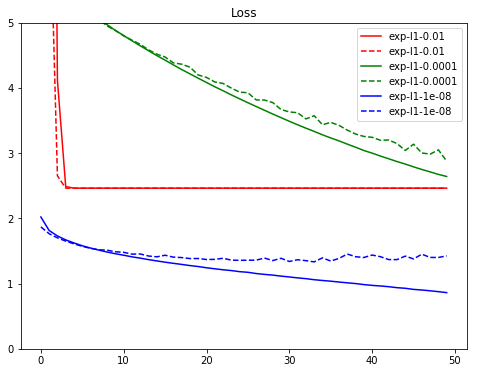

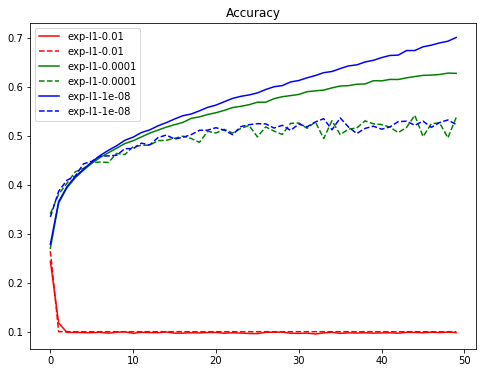

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [23]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 185us/step - loss: 18.8124 - acc: 0.2714 - val_loss: 17.3711 - val_acc: 0.3416
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 16.1589 - acc: 0.3545 - val_loss: 14.9918 - val_acc: 0.3719
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 13.9698 - acc: 0.3788 - val_loss: 12.9867 - val_acc: 0.3936
Epoch 4/50
50000/50000 [==============================] - 8s 170us/step - loss: 12.1168 - acc: 0.3949 - val_loss: 11.2775 - val_acc: 0.3987
Epoch 5/50
50000/50000 [==============================] - 9s 170us/step - loss: 10.5424 - acc: 0.4051 - val_loss: 9.8278 - val_acc: 0.4113
Epoch 6/50
50000/50000 [==============================] - 8s 168us/step - loss: 9.2036 - acc: 0.4119 - val_loss: 8.5988 - val_acc: 0.4121
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 8.0620 - acc: 0.4180 - val_loss: 

Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 13.0182 - acc: 0.3655 - val_loss: 12.1293 - val_acc: 0.3747
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 11.3437 - acc: 0.3890 - val_loss: 10.5991 - val_acc: 0.3909
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 9.9286 - acc: 0.4027 - val_loss: 9.2945 - val_acc: 0.4045
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 8.7269 - acc: 0.4139 - val_loss: 8.1960 - val_acc: 0.4142
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 7.7044 - acc: 0.4230 - val_loss: 7.2467 - val_acc: 0.4247
Epoch 7/50
50000/50000 [==============================] - 9s 171us/step - loss: 6.8326 - acc: 0.4278 - val_loss: 6.4443 - val_acc: 0.4285
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 6.0896 - acc: 0.4322 - val_loss: 5.7560 - val_acc: 0.4318
Epoch 9/50
50000/50000 [======

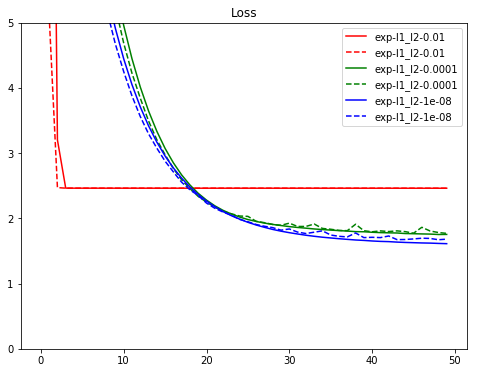

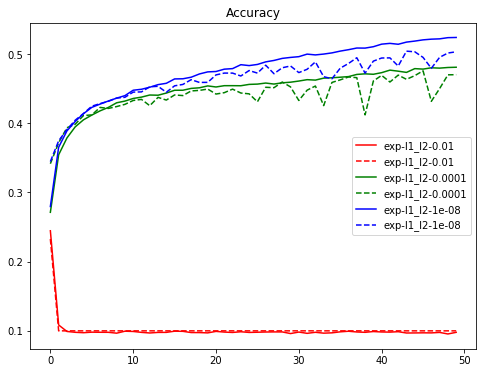

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()